# Lista 03 - ICs + Bootstrap

In [8]:
# -*- coding: utf 8

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

# Exercício 01:
Vamos utilizar a base de dados de recém-nascidos disponibilizada no exercício.

In [9]:
df = pd.read_csv('baby.csv')

# Convertendo para unidades não EUA
df['Birth Weight'] = 0.0283495 * df['Birth Weight']
df['Maternal Pregnancy Weight'] = 0.0283495 * df['Maternal Pregnancy Weight']
df['Maternal Height'] = 0.0254 * df['Maternal Height']

df.describe()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,3.386703,279.101363,27.228279,1.626855,3.642307
std,0.519609,16.010305,5.817839,0.064163,0.587807
min,1.559222,148.000000,15.000000,1.346200,2.466407
25%,3.061746,272.000000,23.000000,1.574800,3.238930
50%,3.401940,280.000000,26.000000,1.625600,3.543687
75%,3.713785,288.000000,31.000000,1.676400,3.940580
max,4.989512,353.000000,45.000000,1.828800,7.087375


A) Plote uma PDF dos dados da coluna "Gestational Days".

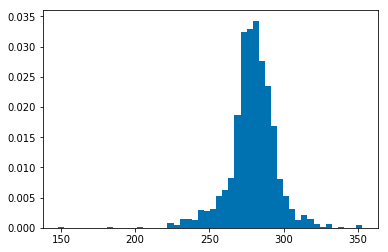

In [10]:
df_gd = df['Gestational Days']
plt.hist(df_gd, density=True, bins=50)
plt.show()

B) Para o número de dias de gestação, determine com 95% de o Intervalo de Confiança. Não utilize a técnica de bootstrap.

Retorne uma lista com os valores inferior e superior do intervalo de confiança.
Exemplo:
```python
return [inferior,superior]
```

In [11]:
def calcula_IC_gestacao(df_gd):
    dff = df.describe()
    med = dff['Gestational Days'][1]
    std = df['Gestational Days'][2]
    s_over_n = std / np.sqrt(len(df_gd))
    ic_1 = med - 1.96 * s_over_n
    ic_2 =med + 1.96 * s_over_n
    ic = [ic_1, ic_2]
    ic
    return ic
calcula_IC_gestacao(df_gd)

[263.1416076410773, 295.0611180829431]

C) Na função abaixo, retorne o número da opção que melhor define o que indica o Intervalo de Confiança:

    1: A média da amostra está com 95% de probabilidade dentro do intervalo
    2: 95% dos valores da população estão dentro do intervalo
    3: O intervalo inclui a média da população com 95% de probabilidade
    4: 5% da amostra está a mais que 1.96 de distância da média da população
    5: Nenhuma das anteriores

In [16]:
def resposta():
    r = 3
    return r
resposta()

3

# Exercício 02:

Agora vamos calcular intervalos de confiança utilizando bootstrap.

A) Para a coluna "Maternal Age", plote um histograma dos valores.

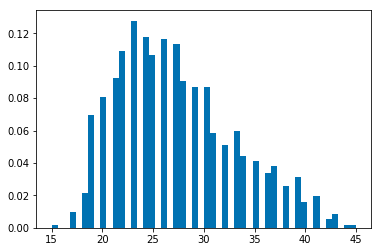

In [17]:
df_ma = df['Maternal Age']
plt.hist(df_ma, density=True, bins=50)
plt.show()

B) Utilizando o mesmo atributo, execute um bootstrap com 5000 amostras e plote a distribuição das medianas.

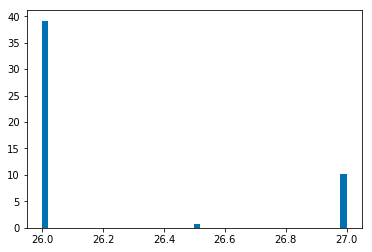

array([26., 26., 26., ..., 27., 26., 27.])

In [19]:
def bootstrap_median(df, n=5000, size=None):
    if size is None:
        size = len(df)
    values = np.zeros(n)
    for i in range(n):
        sample = df.sample(size, replace=True)
        values[i] = sample.median()
    plt.hist(values, density=True, bins=50)
    plt.show()
    return values

bootstrap_median(df_ma)

# Exercício 03:

Plote, em escala log-log, a distribuição dos dados no arquivo "lista.csv".

In [20]:
dados = pd.read_csv('lista.csv')['valores']

A) Calcule a média, mediana, variância, e desvio padrão. Retorne em uma lista da seguinte forma:
```python
return [media,mediana,var,desvio]
```

In [49]:
def ex3(dados):
    media = np.mean(dados)
    mediana = np.median(dados)
    var = np.var(dados)
    desvio = np.std(dados)
    return [media,mediana,var,desvio]
ex3(dados)

[19.508920875736013,
 1.0042548724785347,
 3257557.3210686147,
 1804.8704443999893]

B) Calcule o intervalo de confiança, com confiança de 95%. Retorne em uma lista da seguinte forma:
```python
return [inferior,superior]
```

In [38]:
def ex3_IC(dados):
    s_over_n = np.std(dados) / np.sqrt(len(dados))
    inferior = np.mean(dados) - 1.96 * s_over_n
    superior = np.mean(dados) + 1.96 * s_over_n
    return [inferior,superior]
ex3_IC(dados)

[8.322217963520464, 30.69562378795156]

C) Plote a distribuição dos valores dos dados, em escala log-log. 

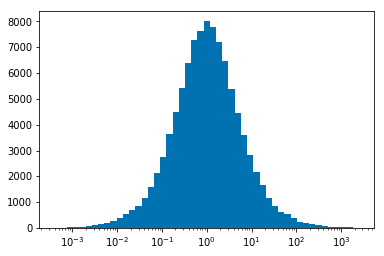

In [63]:
#plt.loglog(dados)
#plt.show()
MIN = .01
MAX = 100.0

plt.figure()
plt.hist(dados, bins = 50 ** np.linspace(np.log10(MIN), np.log10(MAX), 50))
plt.gca().set_xscale("log")
plt.show()

D) Tente explicar o por quê de os valores calculados ficaram tão elevados.

Os valores da tabela tem valores discrepantes, o que causa uma variância e desvio padrões altos, que então faz com que o intervalo de confiaça seja "largo".